<a href="https://colab.research.google.com/github/iagoit/data_science/blob/main/Panorama_do_Covid_19_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama COVID-19 pelo Mundo

<center><img alt="Colaboratory logo" width="70%" src="https://www.feliz.rs.gov.br/web/imgs/textos/informacoes-sobre-o-coronavirus1585585249.jpg"></center>


A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos. Raramente os coronavírus de animais podem infectar pessoas e depois se espalhar entre seres humanos como já ocorreu com o MERS-CoV e o SARS-CoV-2. Até o momento, não foi definido o reservatório silvestre do SARS-CoV-2. (Fonte: [Ministério da Saúde](https://coronavirus.saude.gov.br/sobre-a-doenca))

**Neste *notebook*, iremos analisar os dados referentes ao COVID-19 pelo até o momento do dia *04/05/2021*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

### Importando os dados do COVID-19

* Para acessar o repositório deste dataset você deve entrar em [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data) para conhecer a estrutura do dataset. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv) (atualizado até 04 de maio de 2021).
* Importe os dados do `csv` para a variável `df` da seguinte forma: 
    * *`pd.read_csv("endereco_do_arquivo.csv")`*


### Dicionário de Variáveis

Para este projeto as seguintes variáveis foram utilizadas:

* `continent` - Localização geográfica do continente
* `location` - Localização geográfica
* `date` - Data da observação
* `total_cases` - Total de casos confirmados de COVID-19
* `new_cases` - Novos casos confirmados de COVID-19
* `total_deaths` - Total de mortes causadas pelo COVID-19
* `new_deaths` - Novas mortes causadas pelo COVID-19
* `total_cases_per_million` - Total de casos confirmados de COVID-19 por 1,000,000 de pessoas
* `new_cases_per_million` - Novos casos confirmados de COVID-19 por 1,000,000 pessoas
* `total_deaths_per_million` - 	Total de mortes causadas pelo COVID-19 por 1,000,000 pessoas
* `new_deaths_per_million` - 	Novas mortes causadas pelo COVID-19 por 1,000,000 pessoas
* `population` - População em 2021

*Fonte: [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)*

## Análise exploratória dos dados (Mundo)

O primeiro passo é importar os pacotes necessários para realizar a análise exploratória.

In [119]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Agora iremos importar nossa base de dados, nosso arquivo `csv`.

In [120]:
# importar o dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

Agora que já temos nossas bibliotecas e o nosso dataset importados, vejamos um *preview* do nosso dataset para que possamos entender quais variáveis possamos utilizar.

In [121]:
# verificando as primeiras entradas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Agora que já conhecemos nosso dataset, vejamos quantas variáveis e quantas entradas temos disponíveis.

In [122]:
# verificando a dimensão do dataset
print(' Entradas:\t', df.shape[0], 
       '\n', 
       'Variáveis:\t', df.shape[1])

 Entradas:	 86197 
 Variáveis:	 59


Agora iremos visualizar as colunas presentes no dataset.

In [123]:
# verifica as colunas do dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Para que possamos prosseguir é importante verificarmos os tipos de cara variável, para entender se as variáveis estão da forma correta.

In [124]:
# verifica os tipos de cada coluna
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Mais um detalhe importante é verificar se há valores ausentes no dataset.

In [125]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

weekly_icu_admissions                    0.990835
weekly_icu_admissions_per_million        0.990835
weekly_hosp_admissions                   0.984941
weekly_hosp_admissions_per_million       0.984941
people_fully_vaccinated                  0.921239
people_fully_vaccinated_per_hundred      0.921239
new_vaccinations                         0.903593
icu_patients_per_million                 0.899126
icu_patients                             0.899126
people_vaccinated                        0.894033
people_vaccinated_per_hundred            0.894033
total_vaccinations                       0.886284
total_vaccinations_per_hundred           0.886284
hosp_patients                            0.874416
hosp_patients_per_million                0.874416
new_vaccinations_smoothed_per_million    0.817488
new_vaccinations_smoothed                0.817488
total_tests                              0.547896
total_tests_per_thousand                 0.547896
new_tests_per_thousand                   0.544474


Já identificamos que a variável `date` está no formato object, ou seja, uma string e por isso precisamos transforma-la em um formato de data, para isso iremos utilizar o `datetime`.

In [126]:
df.date = pd.to_datetime(df.date)

Agora que nossa variável já está no formato que precisamos iremos verificar qual é a data máxima do nosso dataset.

In [127]:
df.date.max()

Timestamp('2021-05-05 00:00:00')

## Visão Geral



### Os países com mais casos de COVID-19

Agora que já fizemos as conversões necessárias e já entendemos os dados, é hora que entender o que está acontecendo com o COVID-19. Em primeiro momento iremos analisar a evolução dos casos.

In [128]:
# os paises com mais casos de covid-19
covid_casos = df.loc[df['date'] == '2021-05-04', ['continent', 'location', 'date', 'total_cases']].sort_values(by='total_cases', ascending=False)[0:11].reset_index(drop=True)
covid_casos

,continent,location,date,total_cases
0,NaN,World,2021-05-04,154359533.0
1,NaN,Europe,2021-05-04,45244198.0
2,NaN,Asia,2021-05-04,41447440.0
3,NaN,North America,2021-05-04,37755433.0
4,North America,United States,2021-05-04,32512934.0
5,NaN,European Union,2021-05-04,31072821.0
6,NaN,South America,2021-05-04,25281788.0
7,Asia,India,2021-05-04,20664979.0
8,South America,Brazil,2021-05-04,14856888.0
9,Europe,France,2021-05-04,5741537.0


Como podemos ver os dados na tabela não estão da forma que esperamos, os continentes estão apresentando valores NaN e a localização está com dados de continentes e países, então vamos limpar nosso dataset utilizando o método `dropna`.

In [129]:
# removendo os valores NaN 
covid_casos = covid_casos.dropna(subset=['continent'])
covid_casos[0:6].reset_index(drop=True)

,continent,location,date,total_cases
0,North America,United States,2021-05-04,32512934.0
1,Asia,India,2021-05-04,20664979.0
2,South America,Brazil,2021-05-04,14856888.0
3,Europe,France,2021-05-04,5741537.0
4,Asia,Turkey,2021-05-04,4929118.0


Agora conseguimos deixar a tabela de uma maneira legível e já conseguimos identificar os 5 países com mais casos de COVID-19. Agora vamos plotar uma gráfico e ver se conseguimos extrair algum insight.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


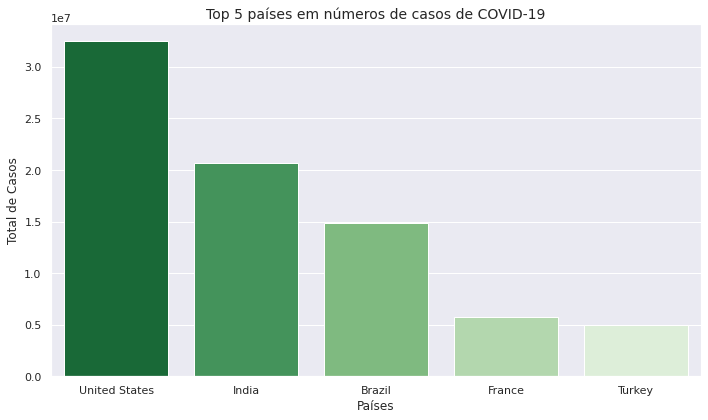

In [130]:
# figura matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot com seaborn
ax = sns.barplot('location', y='total_cases', data = covid_casos, palette='Greens_r')
ax.set_title('Top 5 países em números de casos de COVID-19', fontsize=14)
ax.set_xlabel('Países')
ax.set_ylabel('Total de Casos')
plt.tight_layout()
plt.savefig('graph1.png')

Bom, agora com o gráfico plotado já conseguimos identificar que os Estados Unidos lidera o ranking de casos de COVID-19, seguido de Índia, Brasil, França e Turquia. Mesmo vendo esse gráfico não é possível dizer se os Estados Unidos irá continuar liderando ou não este ranking, precisaremos ir mais a fundo no problema.

### Os países com mais mortes de COVID-19

Agora que já analisamos os casos, agora é hora de saber se os países que lideram o números de casos, também lideram o número de mortes pelo COVID-19.

In [131]:
# os países com mais mortes causadas pelo covid-19
covid_mortes = df.loc[df['date'] == '2021-05-04', ['continent', 'location', 'date', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:11].reset_index(drop=True)
covid_mortes

,continent,location,date,total_deaths
0,NaN,World,2021-05-04,3227598.0
1,NaN,Europe,2021-05-04,1025369.0
2,NaN,North America,2021-05-04,851630.0
3,NaN,European Union,2021-05-04,694692.0
4,NaN,South America,2021-05-04,685994.0
5,North America,United States,2021-05-04,578499.0
6,NaN,Asia,2021-05-04,540641.0
7,South America,Brazil,2021-05-04,411588.0
8,Asia,India,2021-05-04,226188.0
9,North America,Mexico,2021-05-04,217740.0


Assim como na tabela de anterior, será necessário utilizar o `dropna` para realizar a limpeza na tabela. 

In [132]:
# removendo os valores NaN
covid_mortes = covid_mortes.dropna(subset=['continent'])
covid_mortes[0:6].reset_index(drop=True)

,continent,location,date,total_deaths
0,North America,United States,2021-05-04,578499.0
1,South America,Brazil,2021-05-04,411588.0
2,Asia,India,2021-05-04,226188.0
3,North America,Mexico,2021-05-04,217740.0
4,Europe,United Kingdom,2021-05-04,127803.0


Bom, agora já temos uma tabela limpa e com isso conseguimos identificar algumas mudanças em relação aos casos de COVID-19, mas vamos plotar um gráfico para entender melhor os dados.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


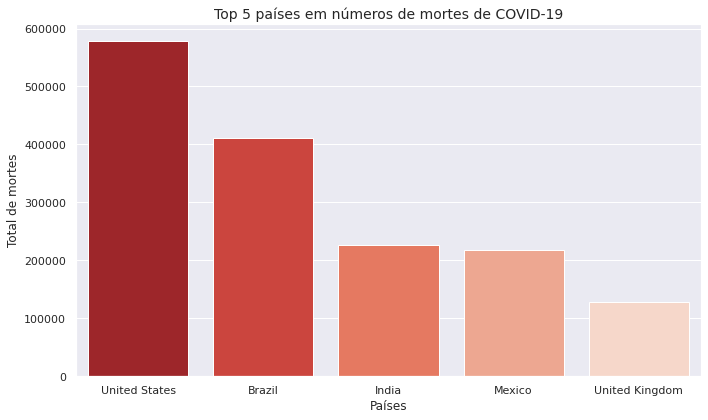

In [133]:
# figura matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot com seaborn
ax = sns.barplot('location', y='total_deaths', data=covid_mortes, palette='Reds_r')
ax.set_title('Top 5 países em números de mortes de COVID-19', fontsize=14)
ax.set_xlabel('Países')
ax.set_ylabel('Total de mortes')
plt.tight_layout()
plt.savefig('graph2.png')

Agora que temos o gráfico vamos falar das mudanças que ocorreram em relação ao casos de COVID-19. O resultado ainda segue com o Estados Unidos liderando o ranking, ou seja, lidera o ranking de casos e mortes. A Índia que era segunda colocada em números de casos vira a terceira posição em números de mortes, mesmo tendo mais casos. O Brasil que era terceiro colocado em números de casos fica em segundo colocado em número de mortes, vale ressaltar que a Índia possui 1.366 bilhões de habitantes [(2019), Fonte: Data Commons](https://datacommons.org/place/country/IND?utm_medium=explore&mprop=count&popt=Person&hl=en) e o Brasil possui 211 milhões [(2019), Fonte: Data Commons](https://datacommons.org/place/country/BRA?utm_medium=explore&mprop=count&popt=Person&hl=en) de habitantes, ou seja, o Brasil tem mais números de mortes mesmo significando quase 1/7 da população da Índia. E agora o México e o Reino Unido também aparecem com mais casos de mortes que a França e a Turquia.

### Evolução da COVID-19 no mundo

Agora vamos plotar um gráfico para entender o que está acontecendo no mundo em relação ao COVID-19. 

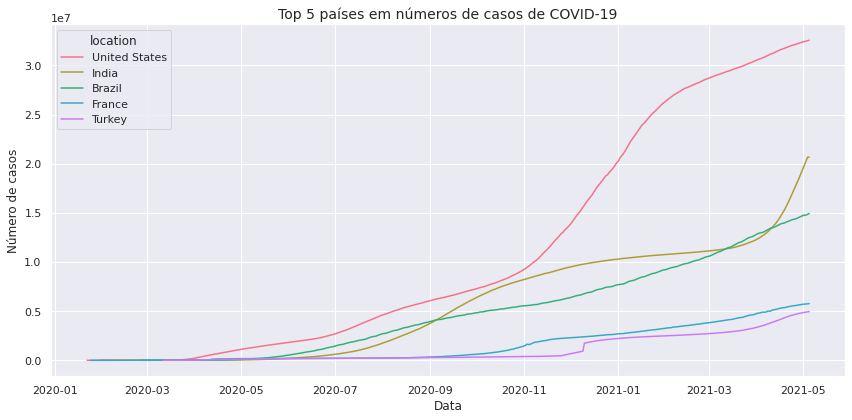

In [134]:
# setando os 5 países com mais casos por index
evolucao_casos = df.copy()
evolucao_casos.set_index('location', inplace = True)
evolucao_casos = evolucao_casos.loc[['United States', 'India', 'Brazil', 'France', 'Turkey']]
evolucao_casos = evolucao_casos.reset_index()

# figura matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# plot com seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=evolucao_casos, palette='husl');
ax.set_title('Top 5 países em números de casos de COVID-19', fontsize=14)
ax.set_xlabel('Data')
ax.set_ylabel('Número de casos')

plt.tight_layout()
plt.savefig('graph3.png')

Com este gráfico é possivel identificar o motivo da Índia ter se tornado o novo epicentro da pandemia, mas vamos entender o que o gráfico está tentando dizer.

* Estados Unidos: O número de casos ainda continua crescendo, mas já da pra identificar que em alguns meses vacinando a população tende a entrar em uma constante ou cair o número de casos diários.
* Índia: Como novo epicentro da pandemia não tem como negar que os casos só tendem a crescer exponencialmente.
* Brasil: O antigo epicentro ainda tende a crescer o número de casos exponencialmente.
* França: Está aumentando os números de casos discretamente.
* Turquia: Segue a mesma linha da frança crescendo os números de casos discretamente.

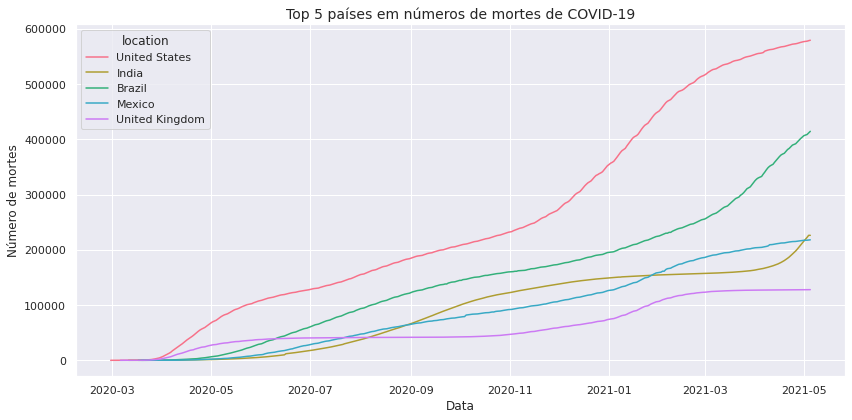

In [135]:
# setando os 5 países com mais mortes por index
evolucao_mortes = df.copy()
evolucao_mortes.set_index('location', inplace = True)
evolucao_mortes = evolucao_mortes.loc[['United States', 'India', 'Brazil', 'Mexico', 'United Kingdom']]
evolucao_mortes = evolucao_mortes.reset_index()

# figura matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# plot com seaborn
ax = sns.lineplot(x='date', y='total_deaths', hue='location', data=evolucao_mortes, 
                  palette='husl');
ax.set_title('Top 5 países em números de mortes de COVID-19', fontsize=14)
ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes')

plt.tight_layout()
plt.savefig('graph4.png')

Assim como no gráfico de casos, vamos tentar entender o que o gráfico está tentando nós dizer.

* Estados Unidos: Percebemos que os Estados Unidos está entrando em um ambiente controlado de mortes diárias no país.
* Índia: A Índia por ter se tornado o novo epicentro do vírus a taxa de mortes só tendem a crescer.
* Brasil: O Brasil está longe de ter um ambiente controlado de mortes diárias.
* México: Tem um crescimento bem discreto, podendo indicar um possivel cenário controlado.
* Reino Unido: Já está com as mortes controladas há alguns meses.

## Análise exploratória do Brasil

Já vimos que o Brasil é o terceiro colocado em números de casos e segundo colocado em número de mortes e estes números não aparentam está caindo.

Agora vamos entender o que está acontecendo no Brasil e comparar com o mundo.

Primeiro iremos copiar e ordenar os dados exclusivamente do Brasil

In [136]:
# copiar o dataframe com informações exclusivamente do Brasil e setar o index por data
df_brasil = df.loc[df['location'] == 'Brazil'].copy()
df_brasil.set_index('date', inplace=True)

# verificar como ficou o head()
df_brasil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


Agora que ja temos nossa tabela apenas com dados do Brasil, vamos verificar quando foi confirmado o primeiro caso no Brasil.

In [137]:
primeiro_caso = df_brasil.loc[df_brasil['total_cases'] == 1, ['total_cases']].sort_values(by='date').head(1)
primeiro_caso

,total_cases
date,
2020-02-26,1.0


Agora iremos verificar a primeira morte confirmada no Brasil.

In [138]:
primeira_morte = df_brasil.loc[df_brasil['total_deaths'] == 1, ['total_deaths']].sort_values(by='date').head(1)
primeira_morte

,total_deaths
date,
2020-03-17,1.0


Agora que já sabemos que a primeira morte aconceteu após 20 de dias desde a primeira confirmação, vejamos como está se comportando os números de COVID-19 no Brasil.

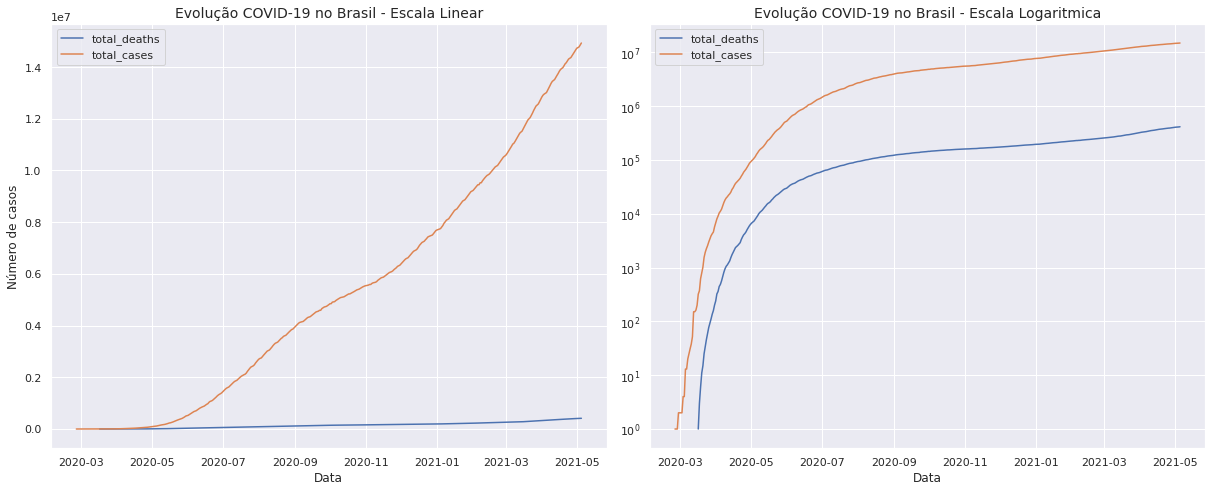

In [139]:
# figura matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# escala linear
ax[0].plot('total_deaths', data=df_brasil)
ax[0].plot('total_cases', data=df_brasil)
ax[0].set_title('Evolução COVID-19 no Brasil - Escala Linear', fontsize=14)
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Número de casos')
ax[0].legend()

# escala logaritmica
plt.yscale('log')
ax[1].plot('total_deaths', data=df_brasil)
ax[1].plot('total_cases', data=df_brasil)
ax[1].set_title('Evolução COVID-19 no Brasil - Escala Logaritmica', fontsize=14)
ax[1].set_xlabel('Data')
ax[1].legend()

plt.tight_layout()
plt.savefig('graph5.png')

## Conclusão

Após esta analise de dados já conseguimos ter vários insights e ter um panorama geral do que está acontecendo no Brasil em relação ao mundo, então irei destacar alguns pontos importantes que conseguimos indentificar com esta analise exploratória.

* Top 5 países com casos confirmados de COVID-19(em ordem decrescente): Estados Unidos, Índia, Brasil, França e Turquia.
* Top 5 países com mortes causadas pela COVID-19(em ordem decrescente): Estados Unidos, Brasil, Índia, México e Reino Unido.
* Brasil (211 milhões de habitantes) x Índia (1.366 bilhões de habitantes): Mesmo o Brasil tendo quase 1/7 da população da Índia, o Brasil ainda ultrapassa a Índia em questão de mortes causadas pelo COVID-19.
* Países que adotaram medidas de distanciamento social ou já estão vacinando a população entrou em um cenário de controle em relação as mortes causadas pela COVID-19.
* A primeira morte no Brasil ocorreu 20 dias após a confirmação do vírus em  território nacional.
* Conseguimos identificar que o Brasil não está nem perto de um cenário controlado.